# Problem Defination 

**These is a classification problem** to predict the rating of the products in Wish.com website based on groub of features that describe the products and other information related to the transaction information. </br>
**The input** for our problem is the various features of the products such as product type, description, price, and badge_local_product,etc..</br>
**The output** from the problem is the rating of the product, which is in categories from 1 to 5.</br> The goal is to estimate how
likely people will like a product and understand the conditions under which a product will be highly rated.


The required function is to **classify** the data into 5 categories of rating 

**The challenges** is the dealing with noisy data, missing values, and irrelevant or unnecessary features.</br>
Also, the features included in the dataset may not be sufficient to accurately predict the product rating, which may require additional data sources or feature engineering


**The benefit of product rating prediction** is that it can assist businesses in better understanding their clientele and developing goods that cater to their preferences. Additionally, it can assist companies in determining the qualities that matter most to consumers, which can guide product development and marketing plans.


## Import Dependences

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score,recall_score,precision_score, roc_curve, precision_recall_curve, roc_auc_score,f1_score


In [2]:
import sys
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import scikitplot as skplt

In [3]:
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)


## Upload Data

In [4]:
train_data = pd.read_csv("train_new.csv")
test_data = pd.read_csv("test_new.csv")

train_data.head(5)

price  retail_price currency_buyer  units_sold  uses_ad_boosts  rating  \
0   8.00             7            EUR       10000               1     4.0   
1   8.00             7            EUR        1000               0     4.0   
2   6.00            34            EUR         100               0     4.0   
3   4.67             4            EUR         100               1     3.0   
4   8.00            11            EUR        1000               0     4.0   

   rating_count  badges_count  badge_local_product  badge_product_quality  \
0          1670             0                    0                      0   
1           843             1                    1                      0   
2            10             0                    0                      0   
3            82             0                    0                      0   
4           127             0                    0                      0   

   ...      merchant_name             merchant_info_subtitle  \
0  ...         keepahorse  88 % avis positifs (66,644 notes)   
1  ...       上海铭启电气科技有限公司  91 % avis positifs (25,752 notes)   
2  ...        zhaodongmei   83 % avis positifs (3,897 notes)   
3  ...         pookie0331   87 % avis positifs (7,497 notes)   
4  ...  shitongyi12683626     91 % avis positifs (173 notes)   

  merchant_rating_count merchant_rating               merchant_id  \
0                 66644        4.137582  577fb2b368116418674befd9   
1                 25752        4.256873  566a3ef17233ff2686443082   
2                  3897        3.928920  5aacd6c1ccf0c83e5a6f3de0   
3                  7497        4.079365  583141fbfef4094e51453d9b   
4                   173        4.306358  5d3bc9f8e13a7e654424a4cb   

  merchant_has_profile_picture  \
0                            1   
1                            0   
2                            0   
3                            0   
4                            0   

                            merchant_profile_picture   theme  crawl_month  \
0  https://s3-us-west-1.amazonaws.com/sweeper-pro...  summer      2020-08   
1                                                NaN  summer      2020-08   
2                                                NaN  summer      2020-08   
3                                                NaN  summer      2020-08   
4                                                NaN  summer      2020-08   

     id  
0   272  
1  1515  
2   940  
3   309  
4   226  

[5 rows x 34 columns]

## Exploar Data

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [6]:
train_data.isna().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

<AxesSubplot:>

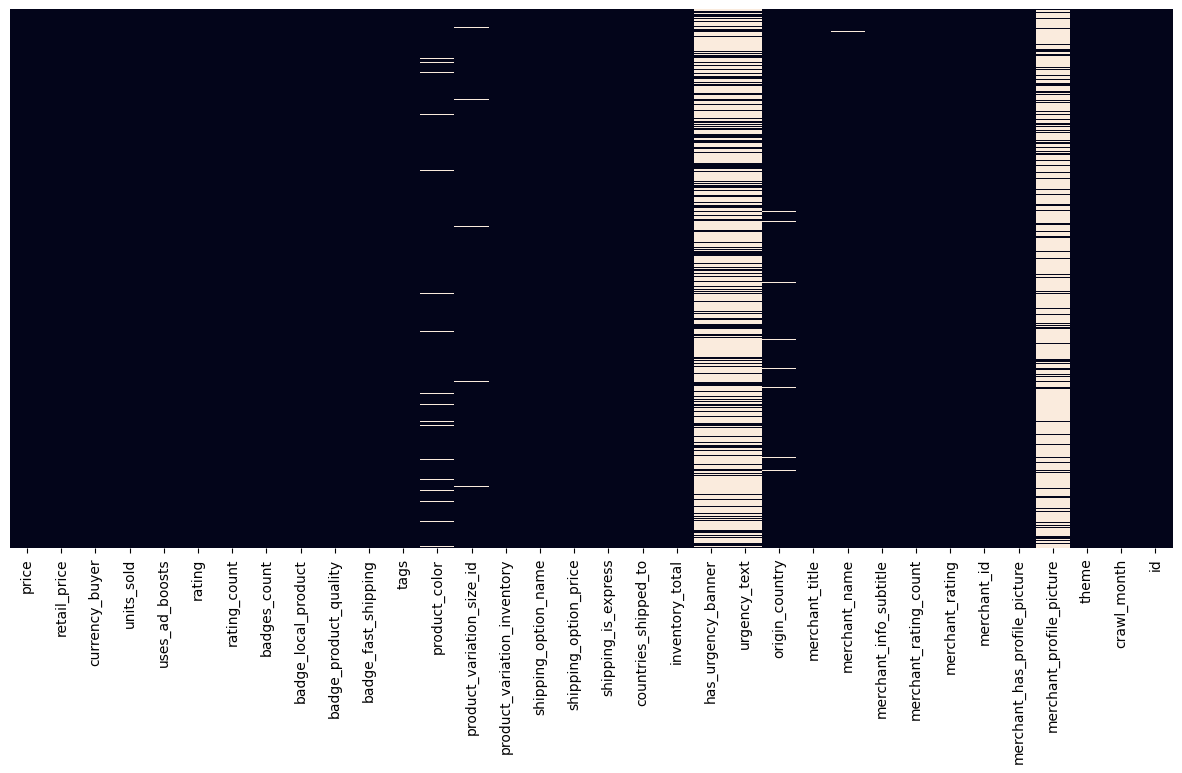

In [7]:
fig, ax = plt.subplots(figsize=(15,7)) 
sns.heatmap(data=train_data.isna(),yticklabels=False,cbar=False)

**from the table above we see that there some nill values at 6 columns 3 of 6 have too many null values that we can not solve it by replacement so we will drope thos columns, for other 3 columns we will try to fill the null values as the number of null values is not sso high** 

### Show Corrolation Between Features And Target Column

In [8]:
corrM = train_data.corr()
corrM

price  retail_price  units_sold  \
price                         1.000000      0.321920   -0.008284   
retail_price                  0.321920      1.000000    0.027722   
units_sold                   -0.008284      0.027722    1.000000   
uses_ad_boosts               -0.053380     -0.006258   -0.018159   
rating                        0.226129      0.086251    0.011729   
rating_count                  0.012339      0.078602    0.891939   
badges_count                  0.086400      0.022785    0.042773   
badge_local_product           0.088888      0.029140   -0.001555   
badge_product_quality         0.021911     -0.001645    0.049948   
badge_fast_shipping           0.109321      0.040533    0.012160   
product_variation_inventory   0.273091      0.142854    0.137254   
shipping_option_price         0.887445      0.287595   -0.020206   
shipping_is_express           0.208582     -0.004474   -0.021991   
countries_shipped_to         -0.034094      0.050735   -0.017361   
inventory_total              -0.177593      0.000539   -0.009210   
has_urgency_banner                 NaN           NaN         NaN   
merchant_rating_count        -0.022850      0.016605    0.228540   
merchant_rating               0.066437      0.040908    0.120750   
merchant_has_profile_picture  0.029713      0.033650    0.170553   
id                            0.008551     -0.028327    0.016600   

                              uses_ad_boosts    rating  rating_count  \
price                              -0.053380  0.226129      0.012339   
retail_price                       -0.006258  0.086251      0.078602   
units_sold                         -0.018159  0.011729      0.891939   
uses_ad_boosts                      1.000000 -0.047359     -0.050653   
rating                             -0.047359  1.000000      0.025344   
rating_count                       -0.050653  0.025344      1.000000   
badges_count                        0.020953  0.234001      0.077896   
badge_local_product                 0.052719  0.009850      0.002116   
badge_product_quality              -0.008984  0.273749      0.067971   
badge_fast_shipping                 0.023487  0.042029      0.074477   
product_variation_inventory        -0.092129  0.048443      0.145737   
shipping_option_price              -0.056537  0.202719      0.000618   
shipping_is_express                -0.010482  0.059141     -0.018663   
countries_shipped_to                0.014885  0.024565      0.004655   
inventory_total                     0.032994 -0.116458     -0.005353   
has_urgency_banner                       NaN       NaN           NaN   
merchant_rating_count               0.031173  0.052712      0.219061   
merchant_rating                     0.034378  0.216270      0.140424   
merchant_has_profile_picture        0.002542  0.025481      0.181525   
id                                  0.011666  0.058845     -0.006072   

                              badges_count  badge_local_product  \
price                             0.086400             0.088888   
retail_price                      0.022785             0.029140   
units_sold                        0.042773            -0.001555   
uses_ad_boosts                    0.020953             0.052719   
rating                            0.234001             0.009850   
rating_count                      0.077896             0.002116   
badges_count                      1.000000             0.547028   
badge_local_product               0.547028             1.000000   
badge_product_quality             0.823006             0.078478   
badge_fast_shipping               0.424190             0.292051   
product_variation_inventory       0.064017             0.002811   
shipping_option_price             0.107870             0.106936   
shipping_is_express               0.283906             0.247444   
countries_shipped_to              0.019558             0.017763   
inventory_total                  -0.126106             0.008509   
has_urgency_banner 

In [9]:
corrM.sort_values(by=['rating'], ascending=False)['rating']

rating                          1.000000
badge_product_quality           0.273749
badges_count                    0.234001
price                           0.226129
merchant_rating                 0.216270
shipping_option_price           0.202719
retail_price                    0.086251
shipping_is_express             0.059141
id                              0.058845
merchant_rating_count           0.052712
product_variation_inventory     0.048443
badge_fast_shipping             0.042029
merchant_has_profile_picture    0.025481
rating_count                    0.025344
countries_shipped_to            0.024565
units_sold                      0.011729
badge_local_product             0.009850
uses_ad_boosts                 -0.047359
inventory_total                -0.116458
has_urgency_banner                   NaN
Name: rating, dtype: float64

<AxesSubplot:>

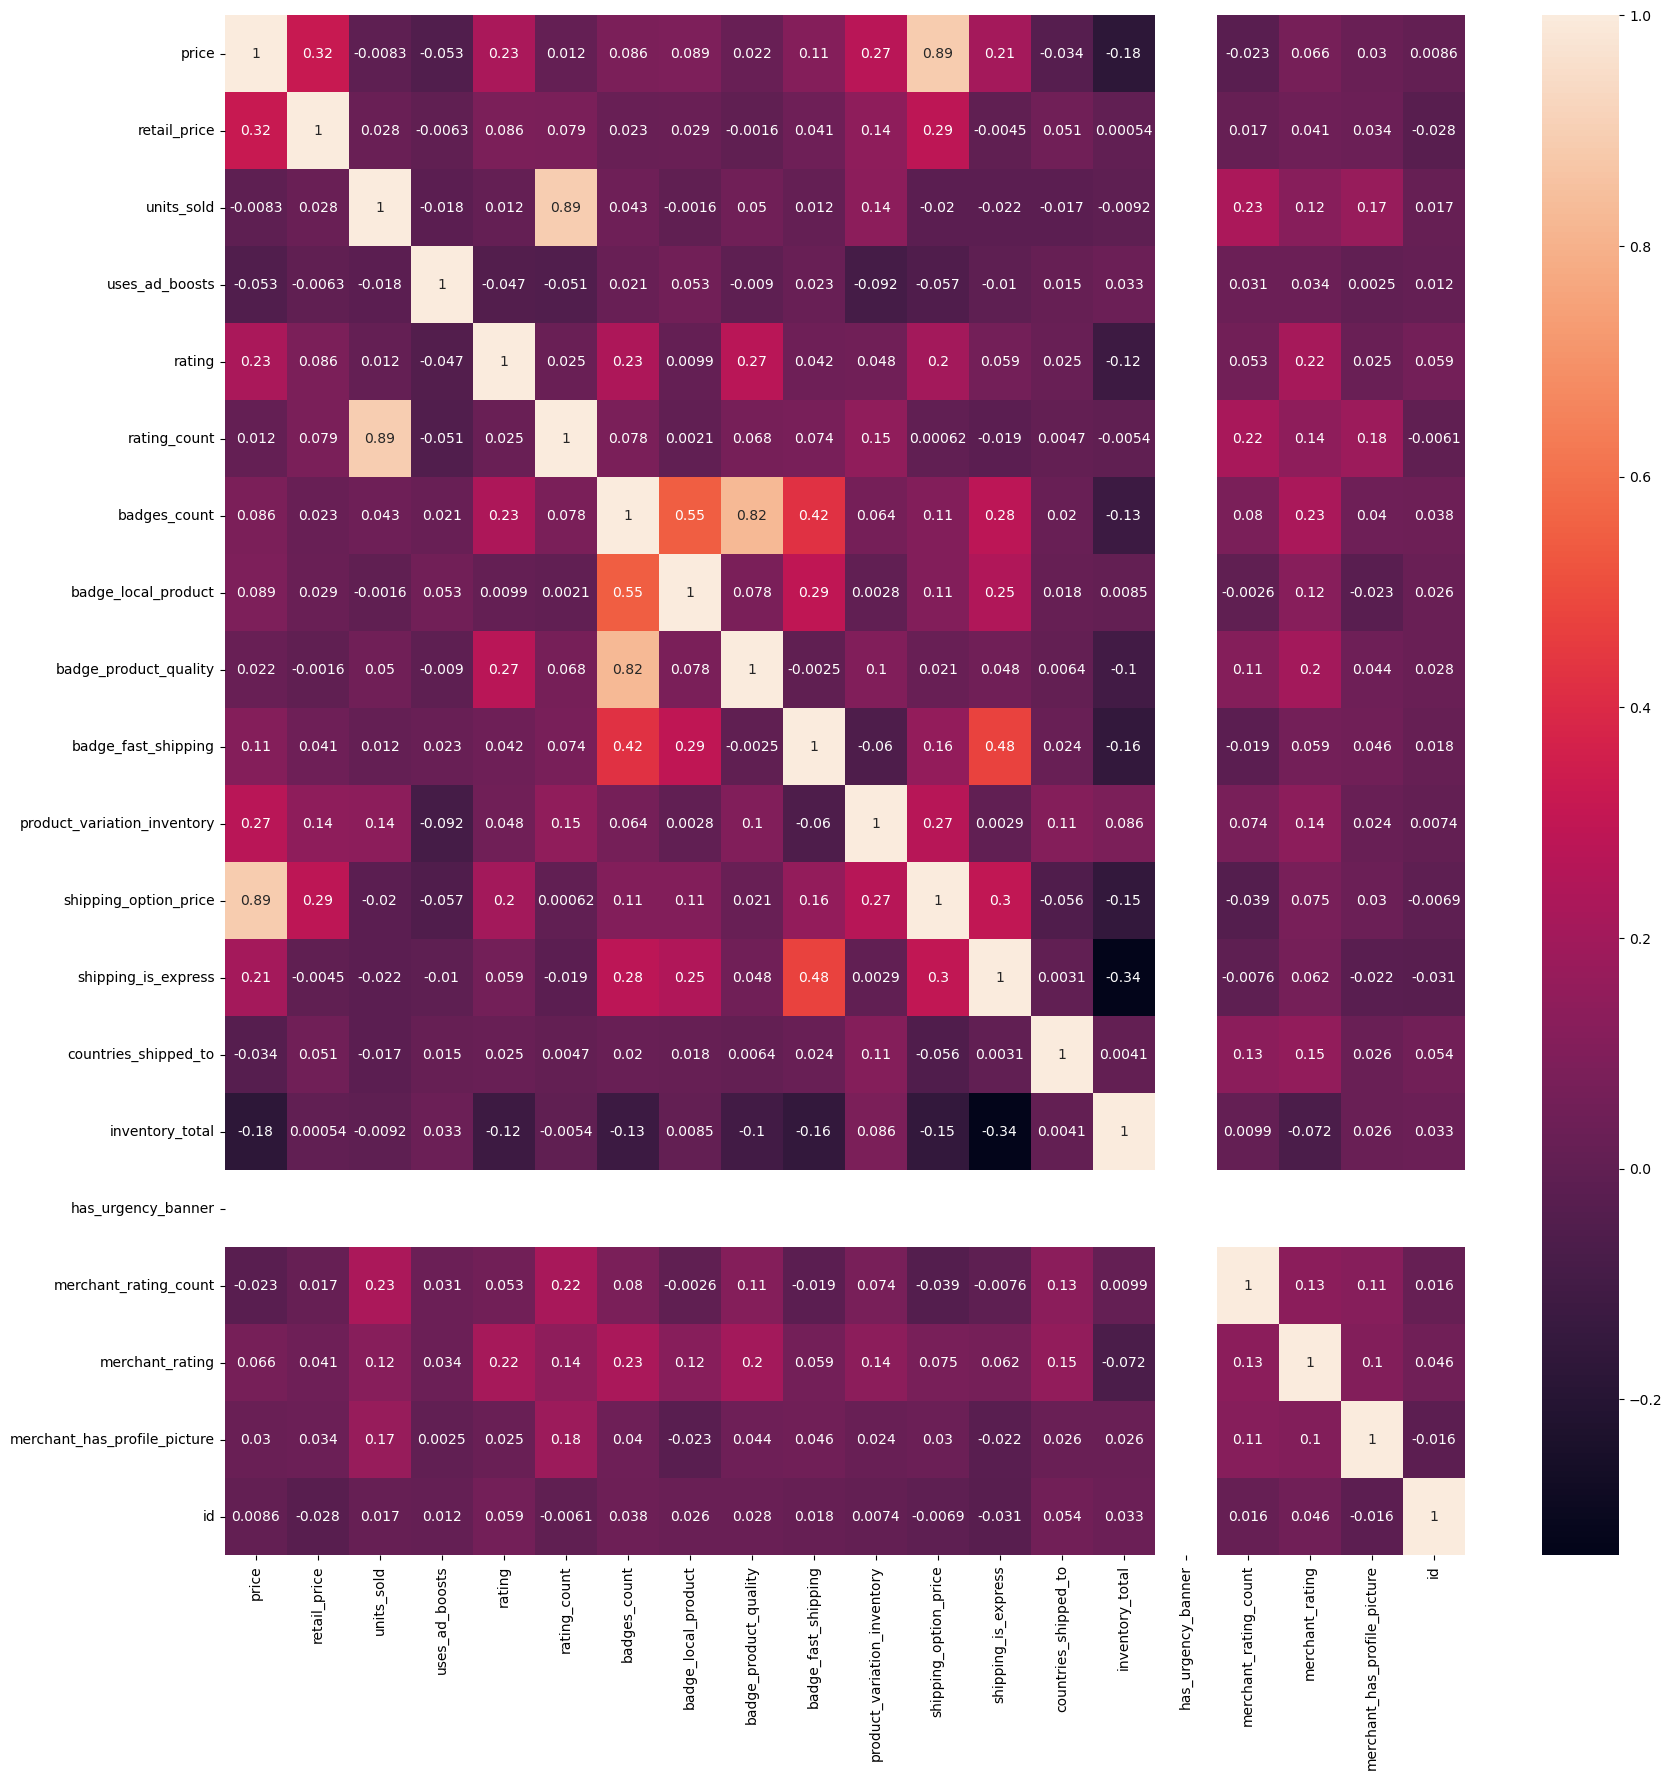

In [10]:
# calculate the correlation matrix
corr = train_data.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns
           , annot=True)

### Exploar Data Distribution

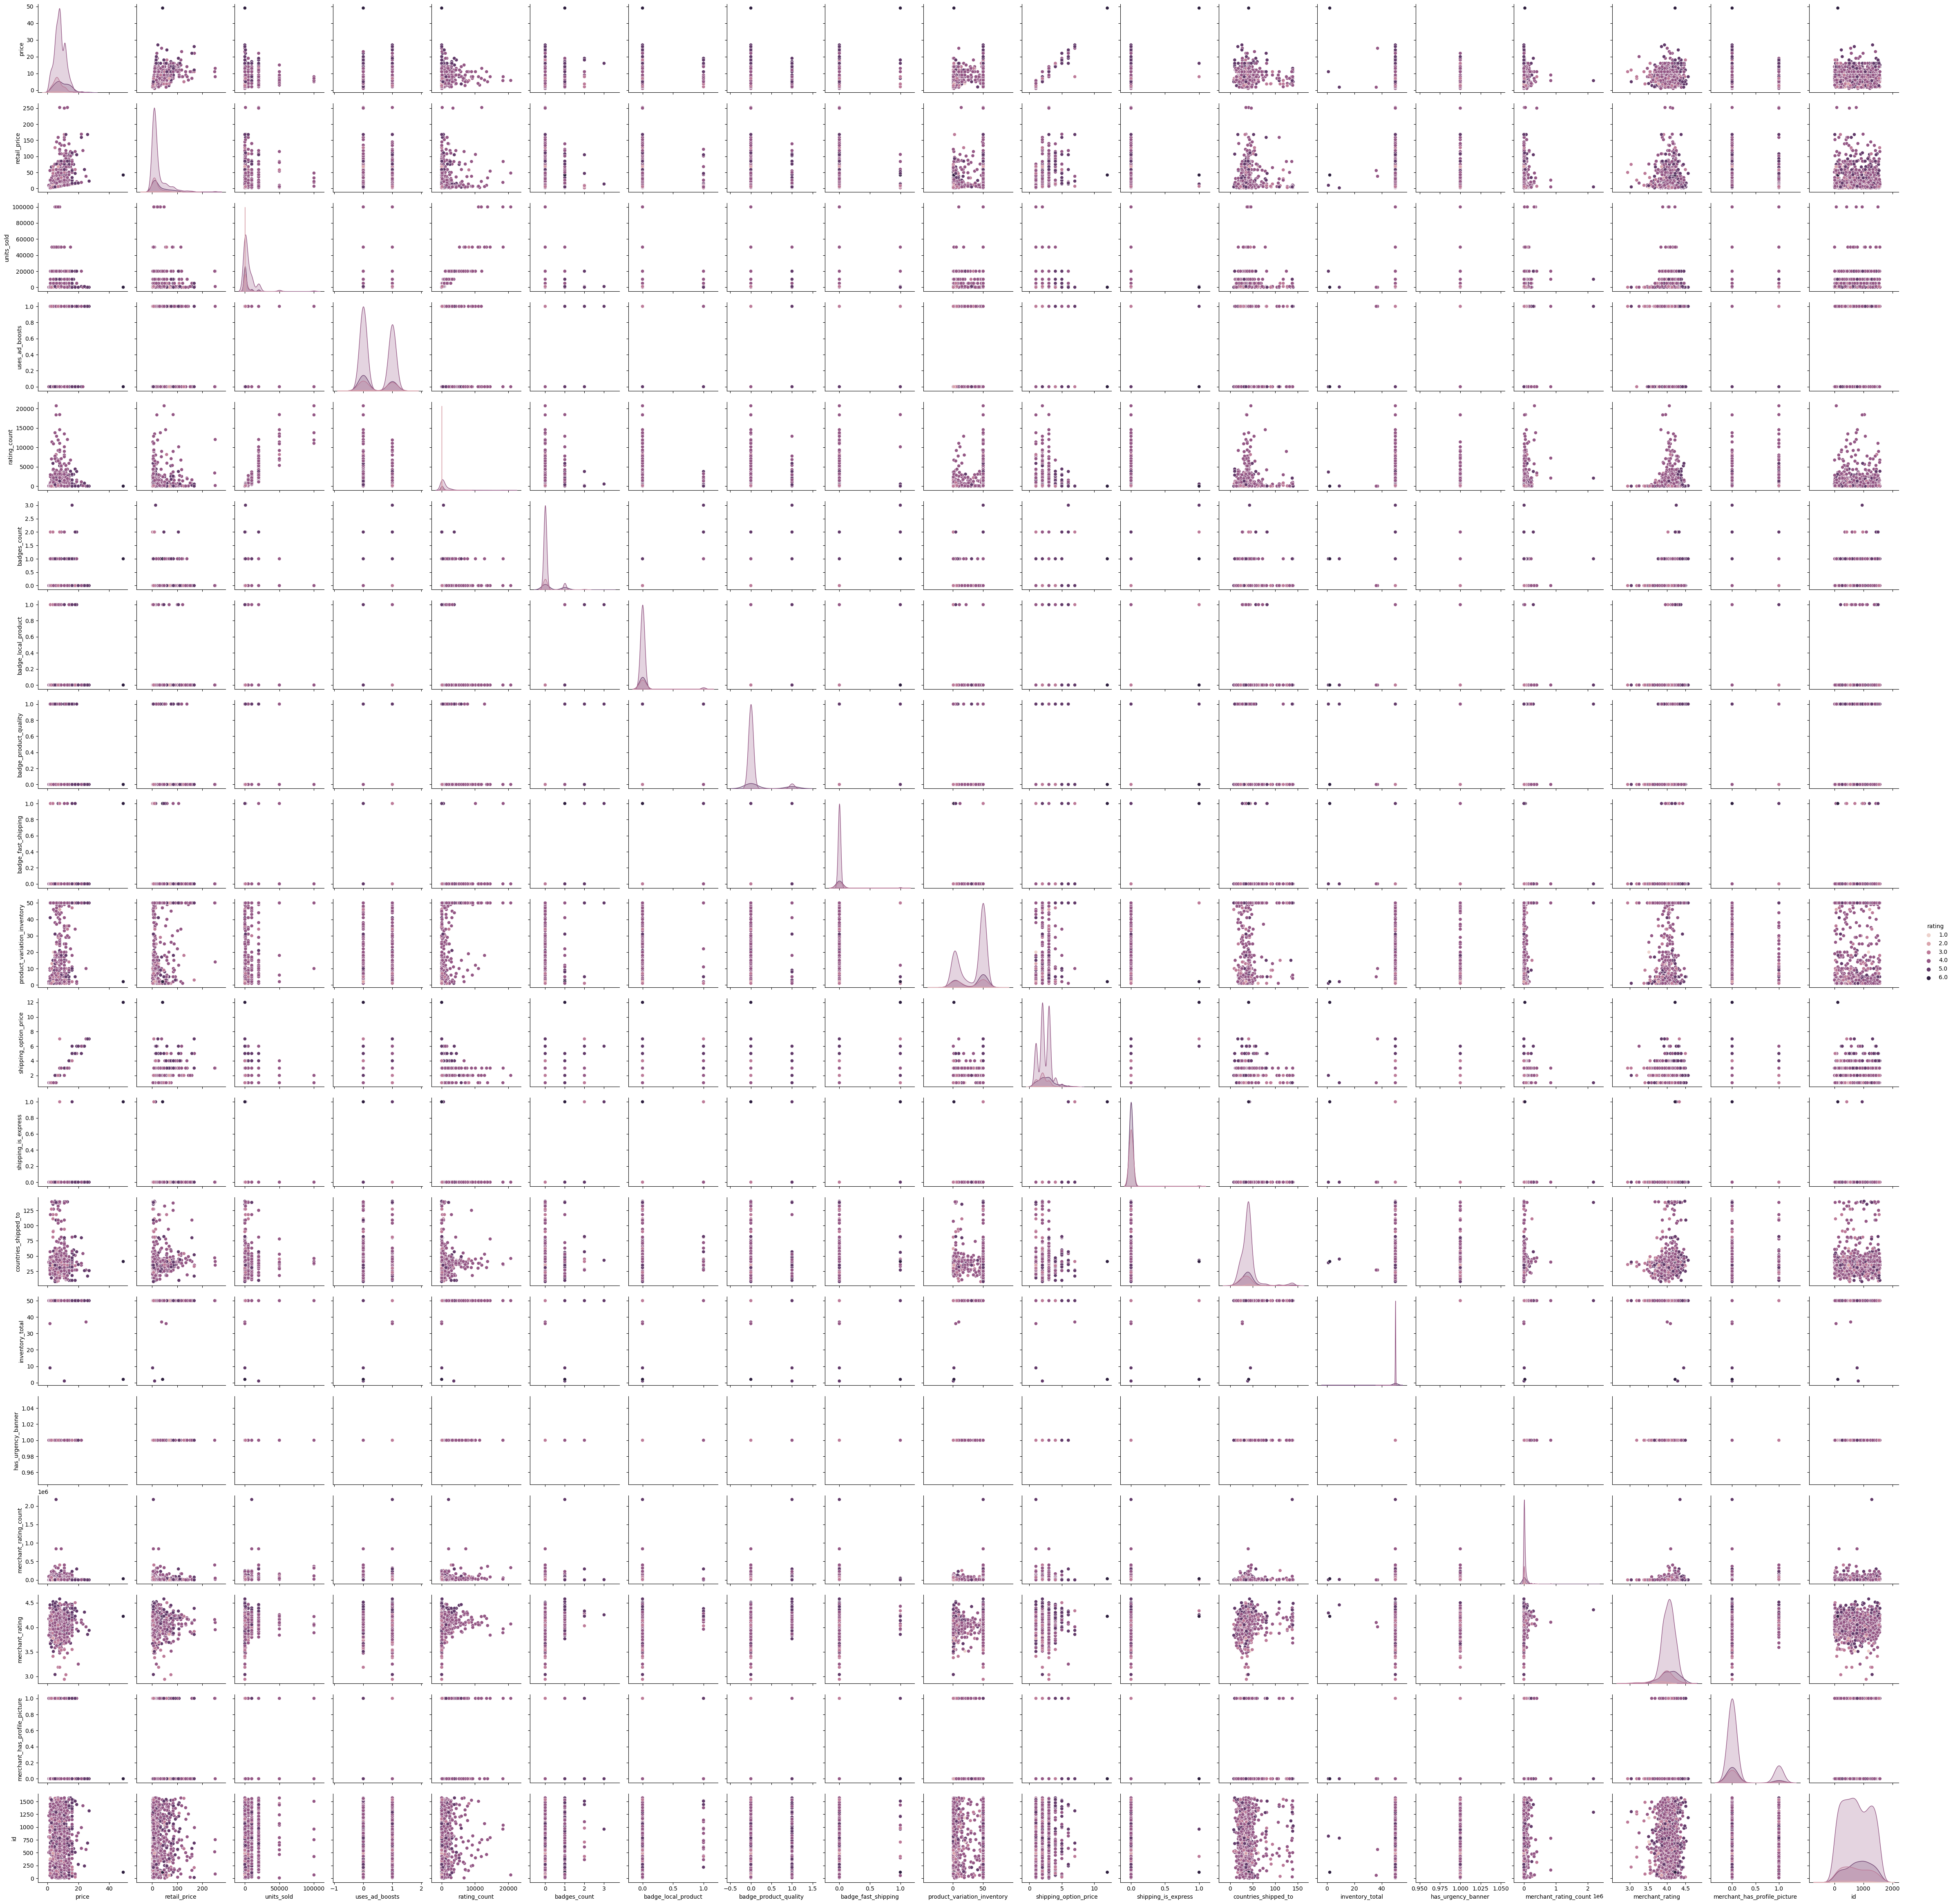

In [11]:
sns.pairplot(data=train_data,hue='rating')

**From above we can notice that the range for each feature is difference,So we will need to normalize data** 

### Check if data is balanced or not 

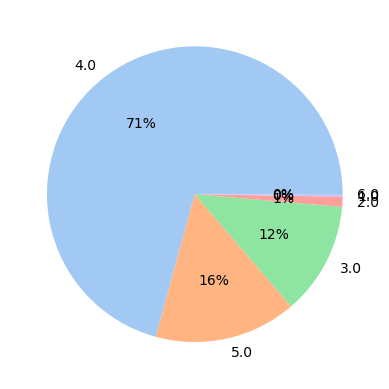

In [12]:
IsBalanced = train_data["rating"].value_counts().reset_index()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(IsBalanced['rating'], labels = IsBalanced['index'], colors = colors, autopct='%.0f%%')
plt.show()

**From Chart above we can clearly see that the data is baised to specific class so we will need to but that in consideration at create the model**

### Show what the relation between features 

**Now we need to see the relation between quality of the product and price and how that affect on rating**

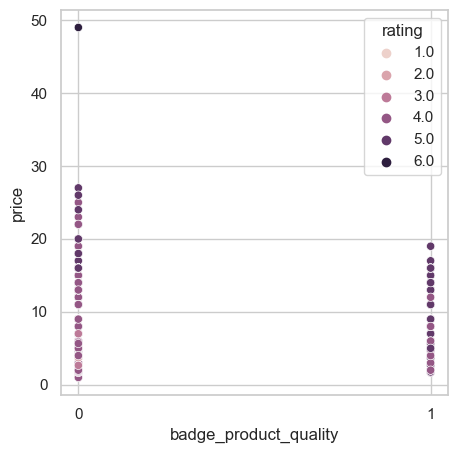

In [13]:
sns.set(style='whitegrid')
fmri = train_data[['rating','price','badge_product_quality']]
fig, ax = plt.subplots(figsize=(5,5))  
sns.scatterplot(x="badge_product_quality",
                    y="price",
                    hue="rating",
                    # style="rating",
                    data=fmri).set_xticks([0,1])

**From above we can notice two things. First, the most of product has no badge quality. Second, when the price increase the number of good rating increase**  

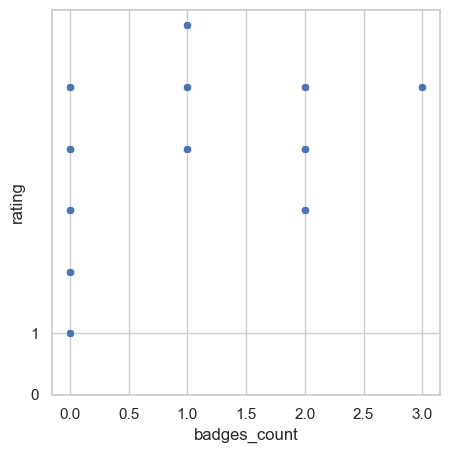

In [14]:
sns.set(style='whitegrid')
fmri = train_data[['rating','badges_count','badge_product_quality']]
fig, ax = plt.subplots(figsize=(5,5))  
sns.scatterplot(x="badges_count",
                    y="rating",
                    # hue="rating",
                    # style="rating",
                    data=fmri).set_yticks([0,1])

In [15]:
train_data[['rating','badge_product_quality']].value_counts()

rating  badge_product_quality
4.0     0                        732
3.0     0                        135
5.0     0                        121
        1                         49
4.0     1                         42
2.0     0                         12
1.0     0                          2
6.0     0                          1
dtype: int64

## Preprocessing¶


In [16]:
train_data = pd.read_csv("train_new.csv")
test_data = pd.read_csv("test_new.csv")
# train_data.head(5)

### Drop unwanted classes 

In [17]:
#For training
i = train_data[train_data['rating'] == 6].index
train_data.drop(i, inplace=True)


In [18]:
## Check if the row droped or not
train_data[train_data['rating'] == 6]

Empty DataFrame
Columns: [price, retail_price, currency_buyer, units_sold, uses_ad_boosts, rating, rating_count, badges_count, badge_local_product, badge_product_quality, badge_fast_shipping, tags, product_color, product_variation_size_id, product_variation_inventory, shipping_option_name, shipping_option_price, shipping_is_express, countries_shipped_to, inventory_total, has_urgency_banner, urgency_text, origin_country, merchant_title, merchant_name, merchant_info_subtitle, merchant_rating_count, merchant_rating, merchant_id, merchant_has_profile_picture, merchant_profile_picture, theme, crawl_month, id]
Index: []

[0 rows x 34 columns]

### Solve Null values 

In [19]:
train_data.drop(['has_urgency_banner','urgency_text','merchant_profile_picture'],axis='columns', inplace=True)
test_data.drop(['has_urgency_banner','urgency_text','merchant_profile_picture'],axis='columns', inplace=True)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1093 non-null   float64
 1   retail_price                  1093 non-null   int64  
 2   currency_buyer                1093 non-null   object 
 3   units_sold                    1093 non-null   int64  
 4   uses_ad_boosts                1093 non-null   int64  
 5   rating                        1093 non-null   float64
 6   rating_count                  1093 non-null   int64  
 7   badges_count                  1093 non-null   int64  
 8   badge_local_product           1093 non-null   int64  
 9   badge_product_quality         1093 non-null   int64  
 10  badge_fast_shipping           1093 non-null   int64  
 11  tags                          1093 non-null   object 
 12  product_color                 1064 non-null   object 
 13  pro

Feature like **(product_color,product_variation_size_id,origin_country)** is a catogorical features we can solve null values at them by fill null values using mod value

In [21]:
train_data['product_color'].fillna(train_data['product_color'].mode()[0], inplace = True)
train_data['product_variation_size_id'].fillna(train_data['product_variation_size_id'].mode()[0], inplace = True)
train_data['origin_country'].fillna(train_data['origin_country'].mode()[0], inplace = True)

#For test data
test_data['product_color'].fillna(train_data['product_color'].mode()[0], inplace = True)
test_data['product_variation_size_id'].fillna(train_data['product_variation_size_id'].mode()[0], inplace = True)
test_data['origin_country'].fillna(train_data['origin_country'].mode()[0], inplace = True)

In [22]:
# Count number of zeros in all columns of Dataframe
for column_name in train_data.columns:
    column = train_data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if count > 0 : 
        print('Count of zeros in column ', column_name, ' is : ', count)


Count of zeros in column  uses_ad_boosts  is :  620
Count of zeros in column  rating_count  is :  30
Count of zeros in column  badges_count  is :  979
Count of zeros in column  badge_local_product  is :  1072
Count of zeros in column  badge_product_quality  is :  1002
Count of zeros in column  badge_fast_shipping  is :  1081
Count of zeros in column  shipping_is_express  is :  1091
Count of zeros in column  merchant_has_profile_picture  is :  923


### Drop Unwanted Features 

In [23]:
categorical_feature = []
#loop each column
for i in range(train_data.shape[1]):
    #if column datatype is object/categorical
    if train_data[train_data.columns[i]].dtype == 'object':
        categorical_feature.append(train_data.columns[i])
        
#show
categorical_feature

['currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'theme',
 'crawl_month']

In [24]:
train_data[['currency_buyer', ## These feature is constant so it dose not give me any info **
 'tags',   ## Drop It as these feature is not so important **
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'origin_country',
 'merchant_title', ## Most of time these feature do not change so i will drop it
 'merchant_name', ## Most of time these feature do not change so i will drop it
 'merchant_info_subtitle', ## Most of time these feature do not change so i will drop it
 'merchant_id', ## Most of time these feature do not change so i will drop it
 'theme', ## These feature is constant so it dose not give me any info **
 'crawl_month' ## These feature is constant so it dose not give me any info  **
           ]].head()

currency_buyer                                               tags  \
0            EUR  Summer,soildcolor,Plus Size,Tank,camisole,Tops...   
1            EUR  bathing suit,Plus Size,bikini set,sexy swimsui...   
2            EUR  Summer,Vest,momshirt,Get,summer t-shirts,funny...   
3            EUR  Summer,Shorts,pants,Beach,Plus Size,beachpant,...   
4            EUR  Summer,Floral print,women dresses,fashion dres...   

  product_color product_variation_size_id shipping_option_name origin_country  \
0        yellow                         M   Livraison standard             CN   
1         black                         L   Livraison standard             CN   
2         white                         L   Livraison standard             CN   
3      lakeblue                        XS   Livraison standard             CN   
4       apricot                         S   Livraison standard             CN   

                          merchant_title      merchant_name  \
0                             keepahorse         keepahorse   
1  shanghaimingqidianqikejiyouxiangongsi       上海铭启电气科技有限公司   
2                            zhaodongmei        zhaodongmei   
3                             pookie0331         pookie0331   
4                      shitongyi12683626  shitongyi12683626   

              merchant_info_subtitle               merchant_id   theme  \
0  88 % avis positifs (66,644 notes)  577fb2b368116418674befd9  summer   
1  91 % avis positifs (25,752 notes)  566a3ef17233ff2686443082  summer   
2   83 % avis positifs (3,897 notes)  5aacd6c1ccf0c83e5a6f3de0  summer   
3   87 % avis positifs (7,497 notes)  583141fbfef4094e51453d9b  summer   
4     91 % avis positifs (173 notes)  5d3bc9f8e13a7e654424a4cb  summer   

  crawl_month  
0     2020-08  
1     2020-08  
2     2020-08  
3     2020-08  
4     2020-08

In [25]:
train_data[['currency_buyer','theme','crawl_month']].value_counts()

currency_buyer  theme   crawl_month
EUR             summer  2020-08        1093
dtype: int64

We can see that **('currency_buyer','theme','crawl_month')** values are constant so we can not take any info from them, so we will drop these columns.<br> Also feature like **(tags,merchant_title, merchant_name, merchant_info_subtitle, merchant_id)** has no meaningfull value so we will drop it. 

In [26]:
train_data.drop(['currency_buyer','theme','crawl_month','tags','merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id','id'],
  axis='columns', inplace=True)

#For test data 
ids = test_data['id']
test_data.drop(['currency_buyer','theme','crawl_month','tags','merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id'],
  axis='columns', inplace=True)

### Solve Unknown values 

In [27]:
train_dataV2 = train_data.copy()
test_dataV2 = test_data.copy

In [28]:
values = train_data['product_color'].value_counts().reset_index()
index = values[values['product_color'] <10]['index']
index = list(index)
train_data['product_color'].replace(to_replace = index,value='Other',inplace=True)

#For test data
inv_values = values[values['product_color'] >9]['index']
test_data["product_color"] = test_data["product_color"].where(cond = test_data["product_color"].isin(list(inv_values)),other = 'other' )  

In [29]:
#product_color
values = train_data['product_color'].value_counts().reset_index()
index = values[values['product_color'] <10]['index']
index = list(index)
train_data['product_color'].replace(to_replace = index,value='Other',inplace=True)

#For test data
inv_values = values[values['product_color'] >9]['index']
test_data["product_color"] = test_data["product_color"].where(cond = test_data["product_color"].isin(list(inv_values)),other = 'Other' ) 

# product_variation_size_id
values = train_data['product_variation_size_id'].value_counts().reset_index()
index = values[values['product_variation_size_id'] <10]['index']
index = list(index)
train_data['product_variation_size_id'].replace(to_replace = index,value='Other',inplace=True)

#For test data
inv_values = values[values['product_variation_size_id'] >9]['index']
test_data["product_variation_size_id"] = test_data["product_variation_size_id"].where(cond = test_data["product_variation_size_id"].isin(list(inv_values)),other = 'Other' ) 

#shipping_option_name
values = train_data['shipping_option_name'].value_counts().reset_index()
index = values[values['shipping_option_name'] <10]['index']
index = list(index)
train_data['shipping_option_name'].replace(to_replace = index,value='Other',inplace=True)

#For test data
inv_values = values[values['shipping_option_name'] >9]['index']
test_data["shipping_option_name"] = test_data["shipping_option_name"].where(cond = test_data["shipping_option_name"].isin(list(inv_values)),other = 'Other' ) 


#origin_country
values = train_data['origin_country'].value_counts().reset_index()
index = values[values['origin_country'] <10]['index']
index = list(index)
train_data['origin_country'].replace(to_replace = index,value='Other',inplace=True)

#For test data
inv_values = values[values['origin_country'] >9]['index']
test_data["origin_country"] = test_data["origin_country"].where(cond = test_data["origin_country"].isin(list(inv_values)),other = 'Other' ) 



### Convert Categorical Feature to Nummerical

**Now we need to convert categorical feature to numerical using one hot encoding**

In [30]:
categorical_feature = []
#loop each column
for i in range(train_data.shape[1]):
    #if column datatype is object/categorical
    if train_data[train_data.columns[i]].dtype == 'object':
        categorical_feature.append(train_data.columns[i])
        
#show
categorical_feature

['product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'origin_country']

In [31]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [32]:
#convert categorical feature to numerical
#drop_first=True, will help avoid variable dummy trap
train_data = pd.get_dummies(data=train_data,columns=categorical_feature,drop_first=True) 
train_data.head()

price  retail_price  units_sold  uses_ad_boosts  rating  rating_count  \
0   8.00             7       10000               1     4.0          1670   
1   8.00             7        1000               0     4.0           843   
2   6.00            34         100               0     4.0            10   
3   4.67             4         100               1     3.0            82   
4   8.00            11        1000               0     4.0           127   

   badges_count  badge_local_product  badge_product_quality  \
0             0                    0                      0   
1             1                    1                      0   
2             0                    0                      0   
3             0                    0                      0   
4             0                    0                      0   

   badge_fast_shipping  ...  product_variation_size_id_S  \
0                    0  ...                            0   
1                    0  ...                            0   
2                    0  ...                            0   
3                    0  ...                            0   
4                    0  ...                            1   

   product_variation_size_id_S.  product_variation_size_id_XL  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   product_variation_size_id_XS  product_variation_size_id_XXL  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             1                              0   
4                             0                              0   

   product_variation_size_id_XXS  shipping_option_name_Other  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   shipping_option_name_Standard Shipping  origin_country_Other  \
0                                       0                     0   
1                                       0                     0   
2                                       0                     0   
3                                       0                     0   
4                                       0                     0   

   origin_country_US  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 45 columns]

In [33]:
#for test data 
test_data = pd.get_dummies(data=test_data,columns=categorical_feature,drop_first=True) 
test_data.head()

price  retail_price  units_sold  uses_ad_boosts  rating_count  \
0   5.75             5          10               1             0   
1   7.00             7        5000               0           579   
2   5.00            16        1000               1            62   
3  18.00            27        5000               1          1903   
4  12.00            81       20000               0          1799   

   badges_count  badge_local_product  badge_product_quality  \
0             0                    0                      0   
1             0                    0                      0   
2             0                    0                      0   
3             0                    0                      0   
4             0                    0                      0   

   badge_fast_shipping  product_variation_inventory  ...  \
0                    0                            5  ...   
1                    0                           50  ...   
2                    0                           20  ...   
3                    0                           50  ...   
4                    0                           50  ...   

   product_variation_size_id_S  product_variation_size_id_S.  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   product_variation_size_id_XL  product_variation_size_id_XS  \
0                             0                             1   
1                             0                             1   
2                             0                             1   
3                             0                             0   
4                             0                             0   

   product_variation_size_id_XXL  product_variation_size_id_XXS  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   shipping_option_name_Other  shipping_option_name_Standard Shipping  \
0                           0                                       0   
1                           0                                       0   
2                           0                                       0   
3                           0                                       0   
4                           0                                       0   

   origin_country_Other  origin_country_US  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0  

[5 rows x 45 columns]

In [34]:
corrM = train_data.corr()
corrM.sort_values(by=['rating'], ascending=False)['rating']

rating                                    1.000000
badge_product_quality                     0.276168
badges_count                              0.227963
merchant_rating                           0.214589
price                                     0.205523
shipping_option_price                     0.182110
product_color_black                       0.096985
retail_price                              0.084923
shipping_option_name_Standard Shipping    0.064422
product_variation_inventory               0.053252
merchant_rating_count                     0.052878
product_variation_size_id_Other           0.043756
product_color_multicolor                  0.041003
product_color_grey                        0.036637
product_variation_size_id_M               0.035236
merchant_has_profile_picture              0.026963
rating_count                              0.026881
product_color_green                       0.025456
countries_shipped_to                      0.024617
product_color_purple           

In [35]:
X = train_data.copy()
X.drop(['rating'],axis='columns', inplace=True)
y = train_data['rating']

### Using Random Over Sampler method to solve imblancing data 

In [36]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [37]:
# transform the dataset
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)

After useing Random Over Sampler method to solve the problem of imbalancing data the achived accuracy is **80.334** in the test dataset for SVM model </br>
without using it the highest accurace is **79.497** for Decision tree and SVM

### Using PCA Method

In [38]:
test_data.head()

price  retail_price  units_sold  uses_ad_boosts  rating_count  \
0   5.75             5          10               1             0   
1   7.00             7        5000               0           579   
2   5.00            16        1000               1            62   
3  18.00            27        5000               1          1903   
4  12.00            81       20000               0          1799   

   badges_count  badge_local_product  badge_product_quality  \
0             0                    0                      0   
1             0                    0                      0   
2             0                    0                      0   
3             0                    0                      0   
4             0                    0                      0   

   badge_fast_shipping  product_variation_inventory  ...  \
0                    0                            5  ...   
1                    0                           50  ...   
2                    0                           20  ...   
3                    0                           50  ...   
4                    0                           50  ...   

   product_variation_size_id_S  product_variation_size_id_S.  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   product_variation_size_id_XL  product_variation_size_id_XS  \
0                             0                             1   
1                             0                             1   
2                             0                             1   
3                             0                             0   
4                             0                             0   

   product_variation_size_id_XXL  product_variation_size_id_XXS  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   shipping_option_name_Other  shipping_option_name_Standard Shipping  \
0                           0                                       0   
1                           0                                       0   
2                           0                                       0   
3                           0                                       0   
4                           0                                       0   

   origin_country_Other  origin_country_US  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0  

[5 rows x 45 columns]

In [39]:
# Import necessary libraries
from sklearn.decomposition import PCA  # to apply PCA

In [40]:
ids = test_data['id']
test_data2 = test_data.drop('id', axis=1)
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(X)) #scaling the data
scaled_Tdata = pd.DataFrame(scalar.transform(test_data2)) #scaling the data
scaled_data.head()

0         1         2         3         4         5         6   \
0  0.412037 -0.326000  0.935117  0.705685  0.697572 -0.244640 -0.106716   
1  0.412037 -0.326000 -0.213247 -1.417062  0.188196  3.434827  9.370674   
2 -0.141190  0.704362 -0.328084 -1.417062 -0.324875 -0.244640 -0.106716   
3 -0.509086 -0.440485 -0.328084  0.705685 -0.280528 -0.244640 -0.106716   
4  0.412037 -0.173354 -0.213247 -1.417062 -0.252811 -0.244640 -0.106716   

         7         8         9   ...        34        35        36        37  \
0 -0.226487 -0.080474  1.278257  ... -0.568888 -0.083782 -0.080474 -1.098681   
1 -0.226487 -0.080474  1.278257  ... -0.568888 -0.083782 -0.080474 -1.098681   
2 -0.226487 -0.080474  1.278257  ... -0.568888 -0.083782 -0.080474 -1.098681   
3 -0.226487 -0.080474 -1.280788  ... -0.568888 -0.083782 -0.080474  0.910182   
4 -0.226487 -0.080474  1.278257  ...  1.757815 -0.083782 -0.080474 -1.098681   

         38        39        40        41        42        43  
0 -0.077027 -0.206111 -0.127862 -0.093023 -0.056811 -0.109257  
1 -0.077027 -0.206111 -0.127862 -0.093023 -0.056811 -0.109257  
2 -0.077027 -0.206111 -0.127862 -0.093023 -0.056811 -0.109257  
3 -0.077027 -0.206111 -0.127862 -0.093023 -0.056811 -0.109257  
4 -0.077027 -0.206111 -0.127862 -0.093023 -0.056811 -0.109257  

[5 rows x 44 columns]

In [41]:
#Applying PCA
#Taking no. of Principal Components as 20
pca = PCA(n_components = 20)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
Tdata_pca = pd.DataFrame(pca.transform(scaled_Tdata))

data_pca.head()

0         1         2         3         4         5         6   \
0  2.716427 -1.278753  0.491083  0.539839  2.400476 -0.153084  3.458250   
1  3.584598  5.228471 -0.619135 -0.549453  0.387837 -0.006887 -0.461707   
2  1.328753 -0.820231 -0.979410  0.415138 -0.508006  0.161983 -1.173673   
3 -1.258025  0.043319 -0.112716  0.929758 -0.302103 -0.210845  0.474693   
4  2.347312 -0.984255 -1.256395 -0.142883 -0.668291 -1.243222 -0.484787   

         7         8         9         10        11        12        13  \
0 -1.289313  0.348685 -0.710295  2.486431 -0.921733  0.430131  0.583567   
1  1.511577  1.188480 -0.444644 -0.872822  0.746841 -1.139220 -1.396793   
2  1.027841 -0.166372 -0.966913 -0.236220 -0.592374  0.185765  0.294033   
3  0.023729 -0.088614  0.023839  0.394843  0.209616 -0.222194 -0.235332   
4  0.271552 -0.369779  0.420918  0.225753  0.349470 -0.378316 -0.617451   

         14        15        16        17        18        19  
0  0.675942 -1.048936 -0.972925 -0.498302 -0.968383 -1.322010  
1 -0.650066 -0.861347 -0.309983  1.274393 -0.374154 -0.339553  
2 -0.278125 -0.558073 -1.577525 -0.920963 -0.118246  0.241583  
3  0.121601 -0.071918 -0.183606  0.035970  0.378282 -0.138148  
4  0.282164 -0.064482 -0.089895 -0.425711  0.322226  0.121070

<AxesSubplot:>

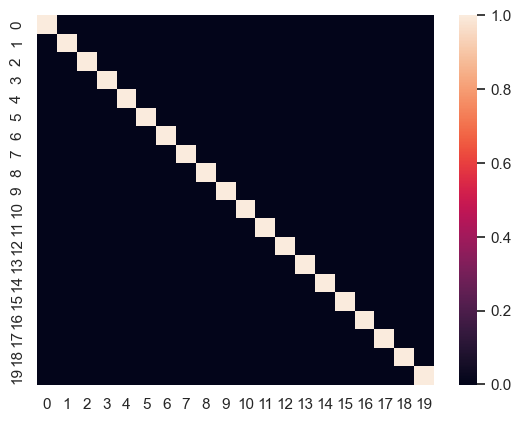

In [42]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

After using PCA (no. of Principal Components as 20)  to reduce dimesinons it get high accuracy in training set **99.2** but in test set the accuracy was not good as it get **78.2** for test data set 

### Split Train And Test Dataset

**Since I have no label for test dataset, So I can not evaluate the model performance. So I will split the train dataset into train and test dataset**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23 , stratify=y) #, stratify=y

### Normalization/Standarization

**There are few popular normalization method we will use them and test what is the affect of each of them on the accuracy.**<br> 
First, i will use **StandardScaler** to normalize my data 

In [44]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)


Second, i will use **min_max_scaled** to normalize my data<br> 

In [45]:
# copy the data
df_min_max_scaled = X.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    


In [46]:
xtrain = X.copy()
xtest = X.copy()
ytrain = y.copy()
ytest = y.copy()

## Model building

### SVM Algorithm

#### First way

In these try we will use C=**100**, gamma=**0.001**

In [47]:
from sklearn.svm import SVC
SVM_M1 = SVC(C=100, gamma=0.001, probability=True)
SVM_M1.fit(xtrain, ytrain)

SVC(C=100, gamma=0.001, probability=True)

#### Second Way

In these try we will use C=**10**, gamma=**0.01**

In [48]:
SVM_M2 = SVC(C=10, gamma=0.01, probability=True)
SVM_M2.fit(xtrain, ytrain)

SVC(C=10, gamma=0.01, probability=True)

The highst accuracy achived by using SVM was **80.334** that achived by using first model of SVM **SVC(C=100, gamma=0.001, probability=True)**

#### Calculate precision,recall,f1-score and confusion matrix

In [49]:
#predict test samples
y_pred = SVM_M1.predict(xtest)
y_proba = SVM_M1.predict_proba(xtest)

# calculate F1 score
score = f1_score(ytest, y_pred,average='weighted')
print('F-Measure: %.3f' % score)

# # print classification report
# print(classification_report(ytest, y_pred))

F-Measure: 0.996


In [50]:
#Calculate Accuracy
print("Test Accuracy :", accuracy_score(ytest, y_pred))

# calculate prediction
precision = precision_score(ytest, y_pred, labels=[1,2,3,4,5],average='weighted')
print('Precision: %.3f' % precision)

# calculate recall
recall = recall_score(ytest, y_pred,average='weighted')
print('Recall: %.3f' % recall)

# calculate F1 score
score = f1_score(ytest, y_pred,average='weighted')
print('F-Measure: %.3f' % score)


Test Accuracy : 0.995710455764075
Precision: 0.996
Recall: 0.996
F-Measure: 0.996


In [51]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.996
Confusion matrix, without normalization


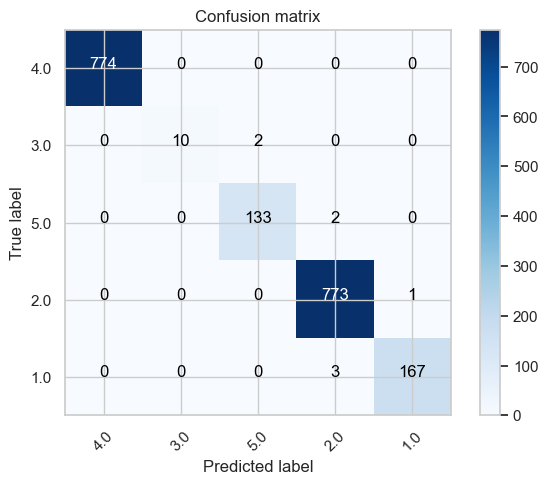

In [52]:
from sklearn import metrics
import itertools

score = metrics.accuracy_score(ytest, y_pred)
print("accuracy:   %0.3f" % score)
c = ytest.unique()

cm = metrics.confusion_matrix(y_true=ytest, y_pred=y_pred)
plot_confusion_matrix(cm, classes=c)

#### Predict result for test data 


In [55]:
ids = test_data['id']
predictions = SVM_M1.predict(test_data.drop('id',axis = 1))
output = pd.DataFrame({'id': ids, 'rating': predictions})
output.to_csv('resultsSVM.csv', index=False)

### Decision Tree Algorithm 


#### First Way

In these try we will use max_depth = **4** ,criterion= **gini**

In [58]:
from sklearn import tree

Tree_M = tree.DecisionTreeClassifier(max_depth =5 ,criterion= 'gini')
Tree_M = Tree_M.fit(xtrain, ytrain)
 
predicted_value = Tree_M.predict(xtrain)
 
# tree.plot_tree(Tree_M)
 

#### Second Way

In these try we will use max_depth = **6** ,criterion= **entropy**

In [59]:
from sklearn import tree

Tree_M1 = tree.DecisionTreeClassifier(max_depth =6 ,criterion= 'entropy')
Tree_M1 = Tree_M1.fit(xtrain, ytrain)
 
predicted_value = Tree_M1.predict(xtrain)
 
# tree.plot_tree(Tree_M)
 

After using these way the highist accuracy for test data is **79.4** ,and it was higher then the first try so the second model of Decision tree is best than the first one

#### Calculate precision,recall,f1-score and confusion matrix

In [60]:
#predict test samples
y_pred = Tree_M1.predict(xtest)
y_proba = Tree_M1.predict_proba(xtest)

# print classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       774
         2.0       0.69      0.75      0.72        12
         3.0       0.72      0.25      0.37       135
         4.0       0.80      0.99      0.89       774
         5.0       0.98      0.46      0.63       170

    accuracy                           0.89      1865
   macro avg       0.84      0.69      0.72      1865
weighted avg       0.89      0.89      0.87      1865



In [61]:
#Calculate Accuracy
print("Test Accuracy :", accuracy_score(ytest, y_pred))

# calculate prediction
precision = precision_score(ytest, y_pred, labels=[1,2,3,4,5],average='weighted')
print('Precision: %.3f' % precision)

# calculate recall
recall = recall_score(ytest, y_pred,average='weighted')
print('Recall: %.3f' % recall)

# calculate F1 score
score = f1_score(ytest, y_pred,average='weighted')
print('F-Measure: %.3f' % score)

Test Accuracy : 0.8895442359249329
Precision: 0.894
Recall: 0.890
F-Measure: 0.871


accuracy:   0.890
Confusion matrix, without normalization


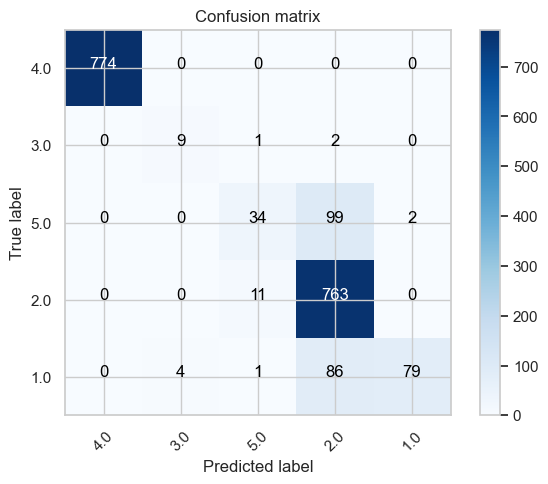

In [62]:
c = ytest.unique()
score = metrics.accuracy_score(ytest, y_pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_true=ytest, y_pred=y_pred)
plot_confusion_matrix(cm, classes=c)

#### Predect result for test data 

In [63]:
ids = test_data['id']
predictions = Tree_M1.predict(test_data.drop('id', axis=1))
output = pd.DataFrame({'id': ids, 'rating': predictions})
output.to_csv('resultsTreeModel.csv', index=False)

### Naive Bayse

In [64]:
from sklearn.naive_bayes import GaussianNB
GS_gnb = GaussianNB(var_smoothing = 0.444)

GS_gnb.fit(xtrain, ytrain)

y_pred = GS_gnb.predict(xtest)
y_proba = GS_gnb.predict_proba(xtest)

# print classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         1.0       0.45      1.00      0.62       774
         2.0       0.00      0.00      0.00        12
         3.0       0.00      0.00      0.00       135
         4.0       0.87      0.14      0.24       774
         5.0       0.20      0.02      0.04       170

    accuracy                           0.47      1865
   macro avg       0.30      0.23      0.18      1865
weighted avg       0.57      0.47      0.36      1865



C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After trying Naive Bayse with different Hyperbarameters the accuracy was so low so we can figure out that it is not good for these problem

#### Calculate precision,recall,f1-score and confusion matrix

In [65]:

#predict test samples
y_pred = GS_gnb.predict(xtest)
y_proba = GS_gnb.predict_proba(xtest)

# print classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         1.0       0.45      1.00      0.62       774
         2.0       0.00      0.00      0.00        12
         3.0       0.00      0.00      0.00       135
         4.0       0.87      0.14      0.24       774
         5.0       0.20      0.02      0.04       170

    accuracy                           0.47      1865
   macro avg       0.30      0.23      0.18      1865
weighted avg       0.57      0.47      0.36      1865



C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
#Calculate Accuracy
print("Test Accuracy :", accuracy_score(ytest, y_pred))

# calculate prediction
precision = precision_score(ytest, y_pred, labels=[1,2,3,4,5,6],average='weighted')
print('Precision: %.3f' % precision)

# calculate recall
recall = recall_score(ytest, y_pred,average='weighted' )
print('Recall: %.3f' % recall)

# calculate F1 score
score = f1_score(ytest, y_pred,average='weighted')
print('F-Measure: %.3f' % score)



Test Accuracy : 0.4745308310991957
Precision: 0.566
Recall: 0.475
F-Measure: 0.360


C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:   0.475
Confusion matrix, without normalization


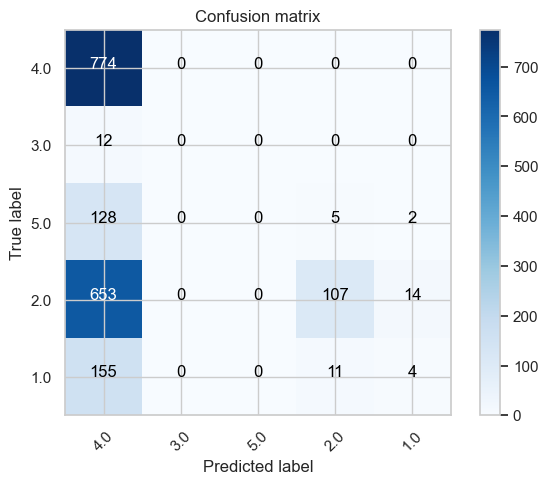

In [67]:
c = ytest.unique()
score = metrics.accuracy_score(ytest, y_pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_true=ytest, y_pred=y_pred)
plot_confusion_matrix(cm, classes=c)

#### Predection for the test data

In [68]:
ids = test_data['id']
predictions = GS_gnb.predict(test_data.drop('id', axis=1))
output = pd.DataFrame({'id': ids, 'rating': predictions})
output.to_csv('resultsNaiveBayseModael.csv', index=False)

### Random Forest

In [69]:
# Necessary imports
from sklearn.ensemble import RandomForestClassifier

# Instantiating logistic regression classifier
Rforest = RandomForestClassifier( random_state = 1)

Rforest.fit(xtrain, ytrain)

RandomForestClassifier(random_state=1)

The highst accuracy reached using Random Forest model without using normalization the accuracy is : **82.008**

#### Calculate precision,recall,f1-score and confusion matrix

In [70]:
#predict test samples
y_pred = Rforest.predict(xtest)
y_proba = Rforest.predict_proba(xtest)

# print classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       774
         2.0       0.86      1.00      0.92        12
         3.0       0.99      0.98      0.99       135
         4.0       1.00      1.00      1.00       774
         5.0       0.99      0.99      0.99       170

    accuracy                           1.00      1865
   macro avg       0.97      0.99      0.98      1865
weighted avg       1.00      1.00      1.00      1865



In [71]:
#Calculate Accuracy
print("Test Accuracy :", accuracy_score(ytest, y_pred))

# calculate prediction
precision = precision_score(ytest, y_pred, labels=[1,2,3,4,5,6],average='weighted')
print('Precision: %.3f' % precision)

# calculate recall
recall = recall_score(ytest, y_pred,average='weighted' )
print('Recall: %.3f' % recall)

# calculate F1 score
score = f1_score(ytest, y_pred,average='weighted')
print('F-Measure: %.3f' % score)

Test Accuracy : 0.995710455764075
Precision: 0.996
Recall: 0.996
F-Measure: 0.996


C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:   0.996
Confusion matrix, without normalization


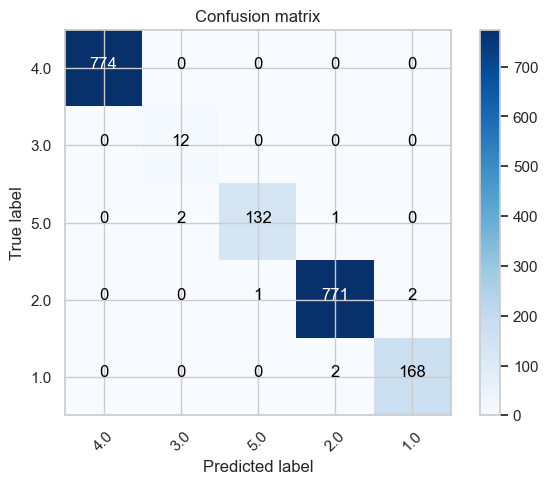

In [72]:
c = ytest.unique()
score = metrics.accuracy_score(ytest, y_pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_true=ytest, y_pred=y_pred)
plot_confusion_matrix(cm, classes=c)

#### Predection for the test data

In [73]:
ids = test_data['id']
predictions = Rforest.predict(test_data.drop('id', axis=1))
output = pd.DataFrame({'id': ids, 'rating': predictions})
output.to_csv('resultsRandomForest.csv', index=False)

# Final Result

The highst accuracy  reached using Random Forest model without using normalization the accuracy is : **82.008**

The second highst accuracy reached using SVC model with C=**100**, gamma=**0.001** , using Random Over Sampler method to solve imbalancing data ,and without using normalization the accuracy is : **80.334**

# Data Mining

**🌈 Why Data Mining is a misnomer? What is another preferred name?**</br></br>

Data mining is regarded as a misnomer because it implies that the process involves nothing more than extracting data from a source, when in fact it entails much more. To extract valuable insights and knowledge from the data, data mining includes a number of phases, including data cleaning, data integration, data transformation, and data analysis.</br></br>
Knowledge Discovery in Databases (KDD), which more correctly describes the process of obtaining valuable data and knowledge from sizable datasets, is another preferred name for data mining. KDD places a strong emphasis on the value of discovering relationships, patterns, and trends in data that can be used for decision-making and problem-solving.

**🌈 What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?** </br></br>
The general knowledge discovery process includes the following steps:
**1_** Data Selection: Determining which data to use for analysis.</br>
**2_** Data Cleaning: Identifying and correcting errors or inconsistencies in the data.</br>
**3_** Data Integration: Combining data from multiple sources into a single dataset.</br>
**4_** Data Transformation: Converting the data into a suitable format for analysis.</br>
**5_** Data Mining: Applying algorithms to identify patterns, relationships, and trends in the data.</br>
**6_** Pattern Evaluation: Assessing the patterns identified in step 5 to determine their usefulness and validity.</br>
**7_** Knowledge Representation: Presenting the patterns and insights in a useful and understandable format.</br>
**8_** Knowledge Utilization: Using the knowledge gained from the previous steps to make decisions or take actions.</br>

A data engineer is responsible for the design, construction, and maintenance of the systems that collect, store, and manage data. They work on ensuring the reliability, efficiency, and scalability of data pipelines and databases.</br></br>

On the other hand, a data scientist or AI engineer uses statistical and machine learning techniques to analyze data and build predictive models. They also work on developing algorithms and software systems that can automate the process of data analysis and decision-making.</br></br>

While there is some overlap in their skill sets, the main difference between a data engineer and a data scientist/AI engineer is their focus. A data engineer is focused on ensuring that data is collected, stored, and managed effectively, while a data scientist/AI engineer is focused on extracting insights and knowledge from the data to drive decision-making.


**🌈 In data mining, what is the difference between prediction and categorization?**</br>
Difference between Classification and Prediction methods in Data Mining
|Prediction|Classification|
| --- | --- | 
|1.In the prediction technique, we need to predict the missing or unavailable value of the dataset.|The classification technique is used to categorise the data, depending on its similarities and to identify the class.|
| --- | --- | 
|2.In the case of prediction, the accuracy relies on how well you guess the value for new data.|In the case of classification, the accuracy relies on encountering the class label accurately.|
| --- | --- | 
|3.	In prediction, the model which is used to predict the strange value is known as a predictor.|In classification, the model used to classify the unknown value is known as a classifier.|
| --- | --- | 
|4.It is created from a training set.|It is also created from a training set.|


**🌈 Why data science/machine learning is a bad idea in the context of information security?**</br>
Data science and machine learning are not inherently bad ideas in the context of information security, but there are certain risks and challenges involved in their implementation.</br></br>
One of the main risks is the potential for bias in the data and models used for analysis. If the data used to train a machine learning algorithm is biased or incomplete, the resulting model will also be biased and may produce inaccurate or unfair results. This can be especially problematic in the context of information security, where decisions based on inaccurate or biased models could lead to security breaches or other negative outcomes.</br></br>
Another challenge is the need for privacy and security in the handling of sensitive data. In the context of information security, data may contain sensitive information such as passwords, financial data, or personal information that must be protected from unauthorized access or disclosure. Machine learning models may also be vulnerable to attacks such as adversarial attacks or model poisoning, which can be used to manipulate the results of the analysis.</br></br>
Overall, data science and machine learning can be powerful tools for improving information security, but they must be implemented carefully and with an understanding of the unique risks and challenges involved.


**🌈 What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines**</br>
The three principles—confidentiality, integrity, and availability which is also the full for CIA in cybersecurity, form the cornerstone of a security infrastructure. In fact, it is ideal to apply these principles to any security program.</br>

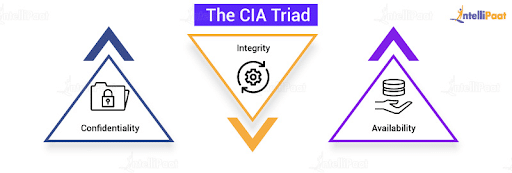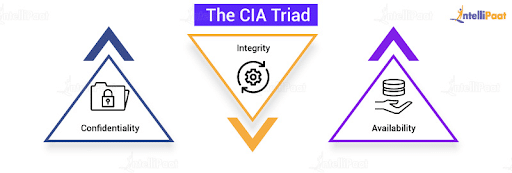
</br></br>
The CIA principle is a widely used framework for evaluating the security and privacy aspects of information systems. CIA stands for Confidentiality, Integrity, and Availability, which are the three primary goals of information security.</br></br>
Confidentiality refers to the protection of sensitive information from unauthorized access or disclosure. In the context of AI systems and pipelines, confidentiality can be achieved through measures such as access controls, data encryption, and data masking.
Integrity refers to the accuracy and consistency of data and systems. In the context of AI systems and pipelines, integrity can be ensured through measures such as data validation, error checking, and version control.</br></br>
Availability refers to the availability and accessibility of data and systems. In the context of AI systems and pipelines, availability can be ensured through measures such as backup and recovery procedures, redundancy, and load balancing.</br></br>
By using the CIA principle, we can assess the security and privacy aspects of AI systems and pipelines by evaluating how well they protect sensitive information (confidentiality), maintain data accuracy and consistency (integrity), and ensure the availability and accessibility of data and systems (availability). This can help identify potential vulnerabilities and risks and guide the implementation of appropriate security and privacy measures to mitigate these risks.
